# Reflexer Model & Simulation

In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.plotting.backend = "plotly"

import sys
sys.path.append('./models/v1')

from models.v1.run import run

In [55]:
from models.v1.config import Config
import models.v1.options as options 

# Update parameter options
params = {
    options.DebtPriceSource.__name__: [options.DebtPriceSource.DEFAULT],
    options.IntegralType.__name__: [options.IntegralType.LEAKY],
}

config = Config(M=params, merge_params=True)
config.M

{'expected_blocktime': [FXnum(family=FXfamily(n_bits=64, n_intbits=None), scaled_value=276701161105643274240)],
 'minumum_control_period': [3600],
 'expected_control_delay': [1200],
 'derivative_smoothing': [1],
 'debt_market_std': [0.001],
 'kp': [FXnum(family=FXfamily(n_bits=64, n_intbits=None), scaled_value=1281023894007607)],
 'ki': [FXnum(family=FXfamily(n_bits=64, n_intbits=None), scaled_value=355839970557)],
 'kp-star': [FXnum(family=FXfamily(n_bits=64, n_intbits=None), scaled_value=1281023894007607)],
 'ki-star': [FXnum(family=FXfamily(n_bits=64, n_intbits=None), scaled_value=0)],
 'kd-star': [FXnum(family=FXfamily(n_bits=64, n_intbits=None), scaled_value=4611686018427387904)],
 'kp-hat': [FXnum(family=FXfamily(n_bits=64, n_intbits=None), scaled_value=1281023894007607)],
 'ki-hat': [FXnum(family=FXfamily(n_bits=64, n_intbits=None), scaled_value=0)],
 'kd-hat': [FXnum(family=FXfamily(n_bits=64, n_intbits=None), scaled_value=1844674407370955264)],
 'alpha': [999998857063901981428

In [56]:
data = run(clear_configs=True, config=config, drop_midsteps=True)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (720, 17, 1, 15)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 1.52s


In [52]:
df = data.copy()
df

,index,error_star,error_hat,old_error_star,old_error_hat,error_star_integral,error_hat_integral,error_star_derivative,error_hat_derivative,target_rate,...,market_price,debt_price,timedelta,timestamp,blockheight,simulation,subset,run,substep,timestep
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,2020-09-07 10:05:33.331824,0,0,0,1,0,0
1,6,0,0.001401345218889526317,0,0,0,2.527326102267260713243,0,0,0,...,1,1.001401345218889526317,3607,2020-09-07 11:05:40.331824,240,0,0,1,6,1
2,12,-0.000436166476687005445,0.000914589219868860579,0,0,0,7.716177212305426556598,-0.000000097336861568217,-0.000000097336861568217,0.000000030289338658810,...,1.000436166476687005445,1.001350755696555866025,4481,2020-09-07 12:20:21.331824,538,0,0,1,6,2
3,18,-0.000296064003843225071,-0.000489052298781297574,0,0,0,8.816402921777320707914,0.000000027093883744682,0.000000027093883744682,0.000000020560000266905,...,1.000431799741635091138,0.999942747442853793564,5171,2020-09-07 13:46:32.331824,882,0,0,1,6,3
4,24,0.000012519243951882030,-0.000820006772524227228,0,0,0,5.878219836232070167291,0.000000068742091288687,0.000000068742091288687,-0.000000000869391941088,...,1.000229552338556447254,0.999409545566032220026,4489,2020-09-07 15:01:21.331824,1181,0,0,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,4296,-0.001530933221319596385,0.003818804983084200983,0,0,0,-1245.301951150576197527872,0.000000019121260069125,0.000000019121260069125,0.000000106314807036059,...,0.961566411265012525551,0.965385216248096726535,3681,2020-10-17 05:40:46.331824,229015,0,0,1,6,716
717,4302,-0.001784235574409950928,0.005918125694288470077,0,0,0,-1226.071513062765172182792,-0.000000064127177997602,-0.000000064127177997602,0.000000123905248222938,...,0.962195492039433262034,0.968113617733721732111,3950,2020-10-17 06:46:36.331824,229278,0,0,1,6,717
718,4308,-0.002282649343185626439,0.005098271367302727381,0,0,0,-1205.129342248680305814607,-0.000000131092522034686,-0.000000131092522034686,0.000000158517315499025,...,0.963164070835011792276,0.968262342202314519657,3802,2020-10-17 07:49:58.331824,229531,0,0,1,6,718
719,4314,-0.002316134699729526782,0.004449592387150815193,0,0,0,-1184.840131770466527843372,-0.000000007878907422103,-0.000000007878907422103,0.000000160842687481235,...,0.963776837473252055970,0.968226429860402871164,4250,2020-10-17 09:00:48.331824,229814,0,0,1,6,719


In [34]:
FXcols = [
    'error_star',
    'error_hat',
    'old_error_star',
    'old_error_hat',
    'error_star_integral',
    'error_hat_integral',
    'error_star_derivative',
    'error_hat_derivative',
    'target_rate',
    'target_price',
    'market_price',
    'debt_price'
]

In [35]:
for c in FXcols:
    print(c)
    df[c] = df[c].apply(lambda x: float(x))

error_star
error_hat
old_error_star
old_error_hat
error_star_integral
error_hat_integral
error_star_derivative
error_hat_derivative
target_rate
target_price
market_price
debt_price


In [36]:
df['target_rate_hourly'] = df.target_rate * 3600
df['error_star_derivative_scaled'] = df.error_star_derivative * 3600
df['error_hat_derivative_scaled'] = df.error_star_derivative * 3600

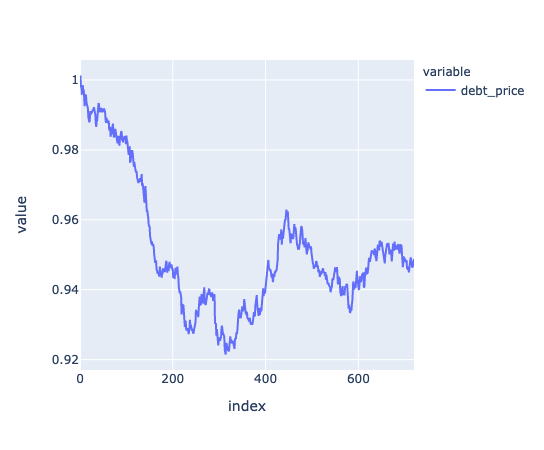

In [37]:
df.debt_price.plot()

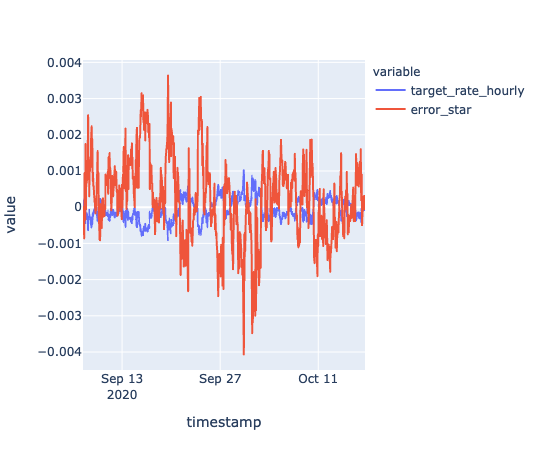

In [38]:
df.plot(kind='line', x='timestamp', y=['target_rate_hourly', 'error_star'])

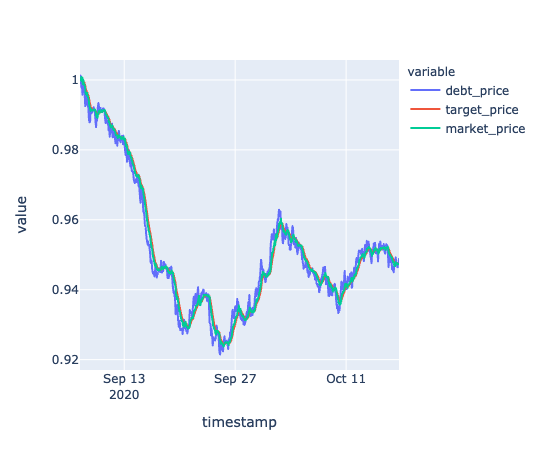

In [39]:
df.plot(kind='line', x='timestamp', y=['debt_price', 'target_price', 'market_price'])

In [40]:
def integral_plot(df):
    from matplotlib.patches import Rectangle

    df['seconds'] = df.timedelta.cumsum()


    x=df.seconds.values
    y=df.error_star.values
    h=(df.error_star.shift(periods=-1)+df.error_star)/2
    w=df.timedelta.values

    plt.figure(figsize=(18, 12))
    plt.plot(x,y , marker='.',linestyle='--', color='r')

    ax = plt.gca()

    for p in range(len(x)-1):
        ax.add_patch(
            Rectangle(
            (x[p], 0),
            w[p+1],
            h[p+1],
            edgecolor = 'blue',
            facecolor = 'cyan',
            fill=True
        ) )

    plt.title('Visualizing Numerical Integration')
    plt.xlabel('Time passed in seconds')
    plt.ylabel('Observed Error')

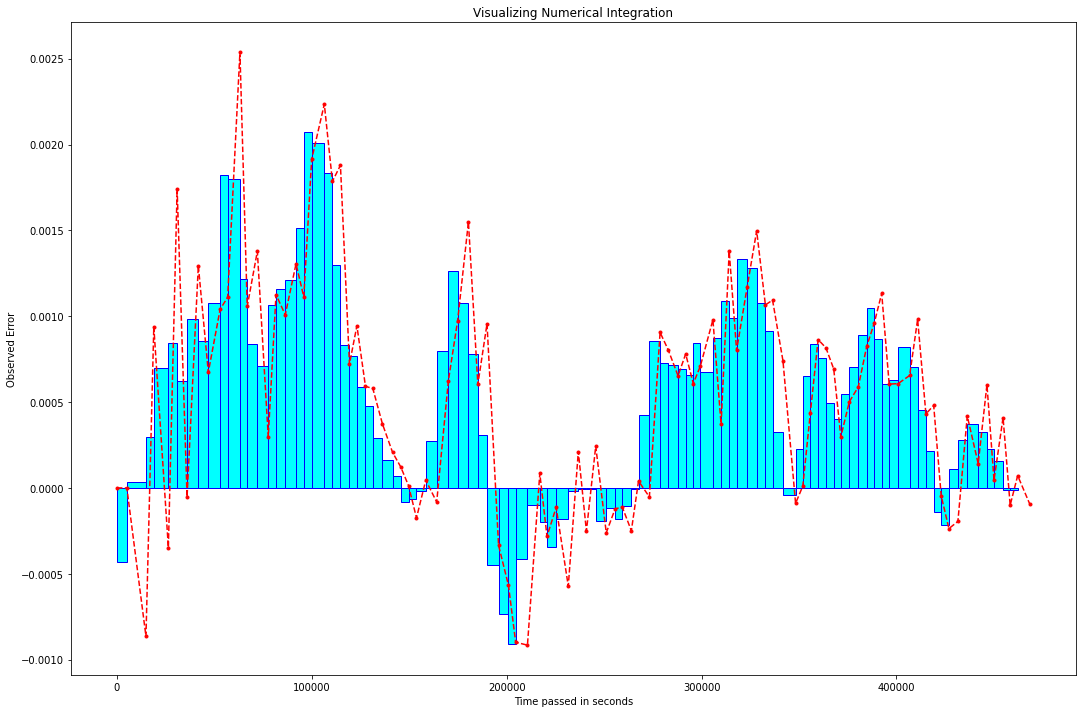

In [41]:
integral_plot(df[df.timestep<100])

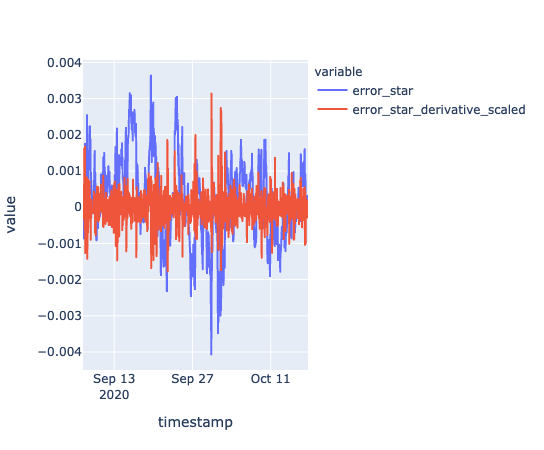

In [42]:
df.plot(kind='line', x='timestamp', y=['error_star','error_star_derivative_scaled'])

Plotly `hist()` error, see: https://github.com/plotly/plotly.py/pull/2713

In [43]:
df.timedelta.apply(lambda x: x/3600).hist()

TypeError: histogram() got an unexpected keyword argument 'legend'

In [44]:
df.error_star.hist()

TypeError: histogram() got an unexpected keyword argument 'legend'

In [45]:
import seaborn as sns; sns.set(style="white", color_codes=True)

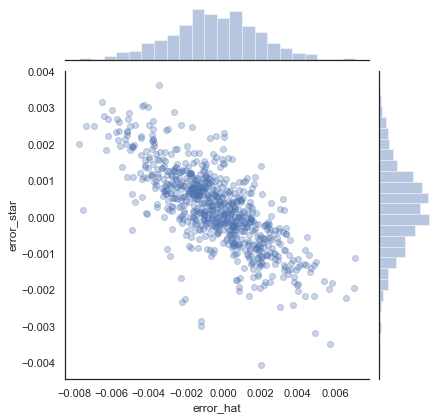

In [46]:
g = sns.jointplot(x="error_hat", y="error_star", alpha=.3, data=df)

In [47]:
3600**2

12960000